<a href="https://colab.research.google.com/github/EugeniaBar/MachineLearning-ANALISTA-/blob/main/Copia_de_CD_5_presentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

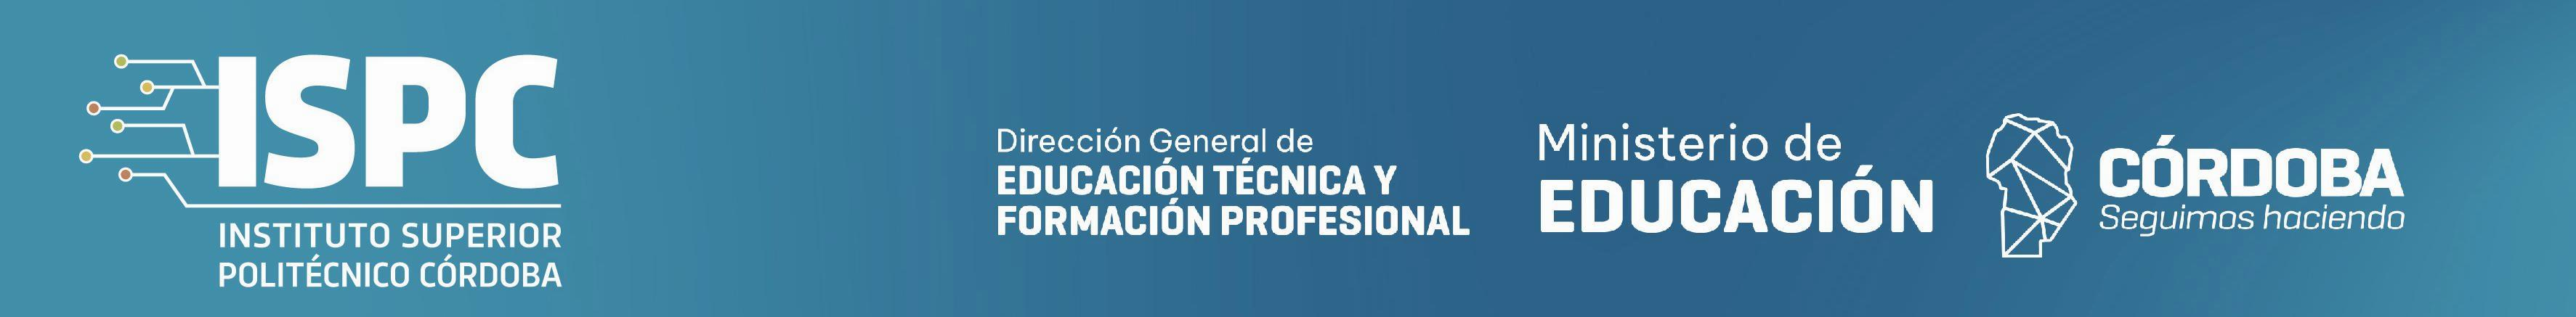


# Grupo: Data Dinasty

| Propuesta de modelo de Regresión Lineal | Ispc | 2024


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # divide datos en conj de entrenamiento y prueba
from sklearn.linear_model import LinearRegression # para crear el modelo de regresion lineal.
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
test = pd.read_csv("Tests.csv", sep=';')
completos = pd.read_csv("Completos.csv", sep=';')

In [ ]:
df_unido = pd.merge(test, completos, on='TestId', how='right')
df_unido.shape

(4845, 32)

In [ ]:
df_limpio = df_unido[['TestId', 'RawDataId', 'Date', 'Time', 'Systolic', 'Diastolic', 'MAP',
       'HR', 'PP', 'PatientId', 'Interpretation', 'HookupStartTime',
       'HookupEndTime', 'Duration', 'SuccessfullReading', 'PercentSuccessfullReading',
       'SysDipping', 'DiaDipping', 'MapDipping', 'Age', 'GenderId',
       'BirthDate']]

In [ ]:
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TestId                     4845 non-null   object 
 1   RawDataId                  3148 non-null   object 
 2   Date                       3148 non-null   object 
 3   Time                       3148 non-null   object 
 4   Systolic                   3148 non-null   float64
 5   Diastolic                  3148 non-null   float64
 6   MAP                        3148 non-null   float64
 7   HR                         3148 non-null   float64
 8   PP                         3148 non-null   float64
 9   PatientId                  4845 non-null   object 
 10  Interpretation             4798 non-null   object 
 11  HookupStartTime            4845 non-null   object 
 12  HookupEndTime              4845 non-null   object 
 13  Duration                   4845 non-null   objec

Diastolic    float64
Systolic     float64
Age            int64
PP           float64
GenderId       int64
HR           float64
dtype: object
    Diastolic  Systolic  Age    PP  GenderId    HR
63       79.0     144.0   58  65.0         0  64.0
64       79.0     151.0   58  72.0         0  81.0
65       89.0     139.0   58  50.0         0  67.0
66       76.0     135.0   58  59.0         0  63.0
67       82.0     145.0   58  63.0         0  67.0


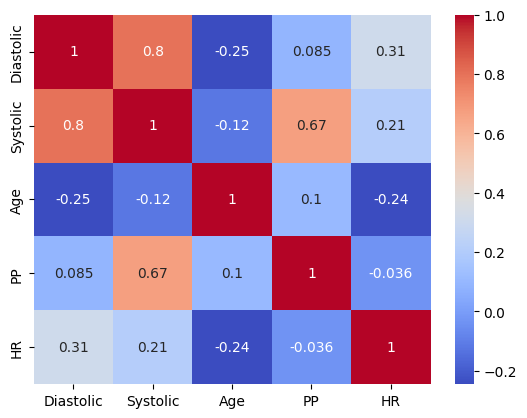

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print(df_limpio[['Diastolic', 'Systolic', 'Age', 'PP','GenderId','HR',]].dtypes)
print(df_limpio[['Diastolic', 'Systolic', 'Age', 'PP','GenderId','HR']].head())

# Eliminar filas con valores faltantes en 'Diastolic', 'Systolic', 'Age' y 'GenderId'
df_limpio = df_limpio.dropna(subset=['Diastolic', 'Systolic', 'Age', 'PP','GenderId','HR'])

# Asegurarse de que los datos sean numéricos
df_limpio['Diastolic'] = pd.to_numeric(df_limpio['Diastolic'], errors='coerce')
df_limpio['Systolic'] = pd.to_numeric(df_limpio['Systolic'], errors='coerce')
df_limpio['Age'] = pd.to_numeric(df_limpio['Age'], errors='coerce')
df_limpio['PP'] = pd.to_numeric(df_limpio['PP'], errors='coerce')
df_limpio['HR'] = pd.to_numeric(df_limpio['HR'], errors='coerce')


# Convertir 'GenderId' en una variable numérica (asignar 0 a un género y 1 al otro)
df_limpio['GenderId'] = df_limpio['GenderId'].apply(lambda x: 1 if x == 'Femenino' else 0)

# Crear la matriz de correlación con las columnas 'Diastolic', 'Systolic', 'Age', 'GenderId'
corr_matrix = df_limpio[['Diastolic', 'Systolic', 'Age', 'PP', 'HR']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.show()

# 🫀 Relación entre Presión Sistólica y Edad


- Comprender la relación: Se busca determinar si existe una relación estadísticamente significativa entre la presión sistólica y la edad. Es decir, si la presión sistólica tiende a aumentar o disminuir con la edad.

- Predicción: Se quiere crear un modelo que permita predecir el valor de la presión sistólica conociendo la edad de un paciente. Esto podría ser útil para identificar a pacientes con mayor riesgo de hipertensión.

Selección de variables, División de datos de entrenamiento y prueba, Ajustes

In [ ]:
# Filtramos el DataFrame para quedarnos solo con las observaciones donde la edad es mayor o igual a 10
df_filtrado = df_limpio[df_limpio['Age'] >= 10]

# Seleccionamos las variables nuevamente a partir del DataFrame filtrado
X = df_filtrado[['Age']]
y = df_filtrado['Systolic']

# Dividir el dataset en conjuntos de entrenamiento 80%  y prueba 20% divide los datos de forma aleatoria.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eliminar las filas con valores NaN en 'y_train'
y_train = y_train.dropna()

X_train = X_train.loc[y_train.index]

# Comprobar las dimensiones de los conjuntos
print(X_train.shape, X_test.shape)

(2518, 1) (630, 1)


Crear y entrenar el modelo de regresión lineal


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Coeficientes del modelo
print(f'Coeficiente: {model.coef_}')
print(f'Intercepción: {model.intercept_}')

Coeficiente: [-0.14562906]
Intercepción: 137.83352605838647


Realizar predicciones


In [ ]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)
print(y_pred[:5])

[128.07637931 127.63949214 127.34823403 127.20260498 128.07637931]


In [ ]:
# Crear un DataFrame para comparar
comparar = pd.DataFrame({'Predicciones': y_pred[:5], 'Valores Reales': y_test[:5]})
print(comparar)

      Predicciones  Valores Reales
4648    128.076379           126.0
1565    127.639492            75.0
2505    127.348234           123.0
2065    127.202605           120.0
4679    128.076379           140.0


 Calcular RMSE, MAE, R2 - Evaluar el rendimiento del modelo

- RMSE: Es útil para entender la magnitud del error en las mismas unidades que los datos originales. #Importar las funciones de evaluación de RMSE Error cuadratico medio, que calcula el error "" entre los valores reales (Y_test) y los predichos (Y_pred). este valor nos indica que tan bien se ajustan el modelo a los datos.
- MAE: Proporciona una medida clara y directa del error promedio.
- R²: Ayuda a evaluar la calidad del ajuste del modelo a los datos

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f'Error cuadrático medio: {rmse}')
print(f'Error absoluto medio: {mae}')
print(f'R² Coeficiente de determinación: {r2}')

Error cuadrático medio: 18.582247682458288
Error absoluto medio: 14.6835397196942
R² Coeficiente de determinación: 0.010340894160167147


Vizualisacion
- La linea de regresion: Muestra la tendencia general de los datos (relacion entre las variables que el modelo aprendio durante el entrenamiento) y se utiliza para hacer la predicción.
- Las predicciones son los valores especificos de y que el modelo calcula para nuevos valores de x usando la linea de regresión

La presión sistólica tiende a disminuir con la edad.


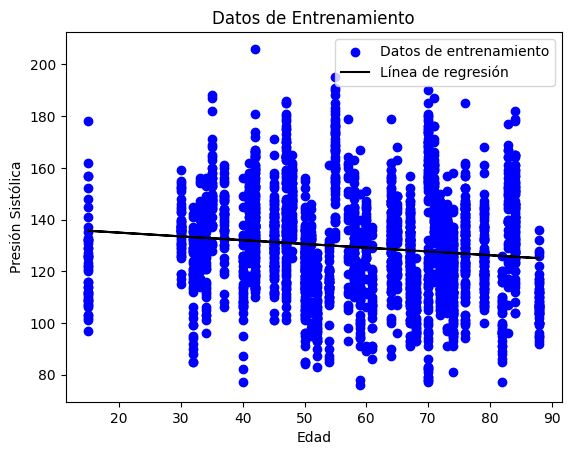

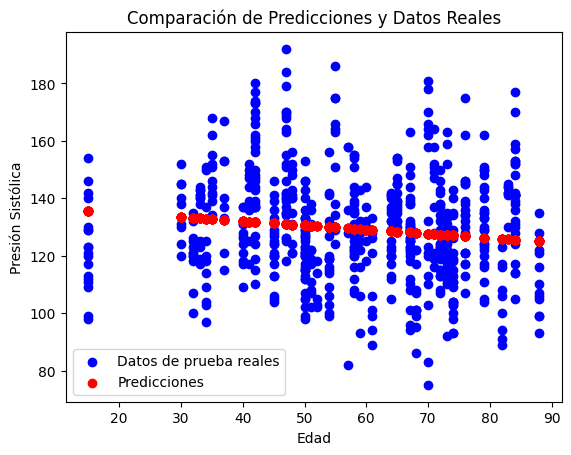

Intersección (b) 137.83352605838647
Pendiente (m) [-0.14562906]


In [ ]:
df_limpio = df_limpio[(df_limpio['Age'] >= 30) & (df_limpio['Age'] <= 100)]

# Elimina filas con valores NaN en 'Systolic' antes de dividir los datos
df_limpio = df_limpio.dropna(subset=['Systolic'])

# Obtener la pendiente
pendiente = model.coef_[0]

# Interpretar la pendiente
if pendiente > 0:
    print("La presión sistólica tiende a aumentar con la edad.")
elif pendiente < 0:
    print("La presión sistólica tiende a disminuir con la edad.")
else:
    print("No se encontró una relación significativa entre la edad y la presión sistólica.")



# Visualización de los datos de entrenamiento y la línea de regresión
plt.scatter(X_train['Age'], y_train, color='blue', label='Datos de entrenamiento')
plt.plot(X_train['Age'], model.predict(X_train), color='black', label='Línea de regresión')
plt.xlabel('Edad')
plt.ylabel('Presión Sistólica')
plt.legend()
plt.title('Datos de Entrenamiento')
plt.show()

# Visualización de los datos de prueba y las predicciones
plt.scatter(X_test['Age'], y_test, color='blue', label='Datos de prueba reales')
plt.scatter(X_test['Age'], y_pred, color='red', label='Predicciones')
plt.xlabel('Edad')
plt.ylabel('Presión Sistólica')
plt.legend()
plt.title('Comparación de Predicciones y Datos Reales')
plt.show()

print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)


### Predecicción de edad y presión Sistolica

##**conclusión** (actualizar)
Pendiente negativa = -0.11802044
Este valor indica la disminución promedio de la presión sistólica por cada año adicional de edad. Es decir, por cada año que aumenta la edad, la presión sistólica tiende a disminuir en aproximadamente 0.118 unidades.


Error Cuadrático Medio (ECM): 19.7462: Este valor indica que, en promedio, las predicciones de tu modelo están desviadas en aproximadamente 19.75 unidades de los valores reales. Es decir, tus predicciones no son muy precisas.
Error Absoluto Medio (MAE): 15.7632: Al igual que el ECM, este valor mide el error promedio de tus predicciones, pero de una manera más directa. Indica que, en promedio, tus predicciones se desvían en aproximadamente 15.76 unidades de los valores reales.
Coeficiente de Determinación (R²): 0.0110: Este valor es muy bajo y significa que solo el 1.10% de la variabilidad en la presión sistólica puede ser explicada por la edad. En otras palabras, la edad es un muy pobre predictor de la presión sistólica en este caso.

La edad no es un buen predictor de la presión sistólica: La baja R² indica que la edad explica una proporción muy pequeña de la variabilidad en la presión sistólica.
El modelo tiene un alto error: Los valores de ECM y MAE son relativamente altos, lo que sugiere que las predicciones del modelo son imprecisas.


#🫀Relacion entre Presión del pulso y Presión Sistolica

- Comprender la relación: Se busca determinar si existe una relación estadísticamente significativa entre la presión sistólica y la presión del pulso.

- Predicción: Se quiere crear un modelo que permita predecir el valor de la presión sistólica conociendo el valor de la presión del pulso. Esto sería útil, por ejemplo, para estimar la presión sistólica en pacientes donde esta medición no está disponible.

Selección de variables, División de datos de entrenamiento y prueba, Ajustes

In [ ]:
# Seleccionar las variables independientes Sistolica (X) y dependiente (y) Presion de
X = df_limpio[['PP']]
y = df_limpio['Systolic']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un imputador para reemplazar los valores NaN con la media
imputer = SimpleImputer(strategy='mean')

# Ajustar el imputador a los datos de entrenamiento y transformar X_train y X_test
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Eliminar las filas con valores NaN en 'y_train' and 'y_test'
y_train = y_train.dropna()
y_test = y_test.dropna()

# Reset the index of y_train and y_test to avoid index mismatch
y_train = y_train.reset_index(drop=True)  # drop=True avoids creating an 'index' column
y_test = y_test.reset_index(drop=True)

# Now you can safely align X_train and X_test
# as they now have matching indices with y_train and y_test.
X_train = X_train[y_train.index]
X_test = X_test[y_test.index]

Crear y entrenar el Modelo de Regresion Lineal **Simple**

In [ ]:
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
# Mostrar las primeras predicciones
print(y_pred[:5])

[129.2544185  123.8183878  129.2544185  109.68470797 132.51603692]


In [ ]:
# Crear un DataFrame para comparar predicciones y valores reales
comparar = pd.DataFrame({'Predicciones': y_pred[:5], 'Valores Reales': y_test[:5]})
print(comparar)

   Predicciones  Valores Reales
0    129.254418           127.0
1    123.818388           137.0
2    129.254418           148.0
3    109.684708           113.0
4    132.516037           129.0


Calcular RMSE, MAE, R2

In [ ]:
#RMSE(raiz del error cuadratico medio), MAE:(error absoluto medio), R2(coef, de determinacion)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f'Error cuadrático medio: {rmse}')
print(f'Error absoluto medio: {mae}')
print(f'R² Coeficiente de determinación: {r2}')

Error cuadrático medio: 14.120101567899729
Error absoluto medio: 11.285871803409913
R² Coeficiente de determinación: 0.49431532710502857


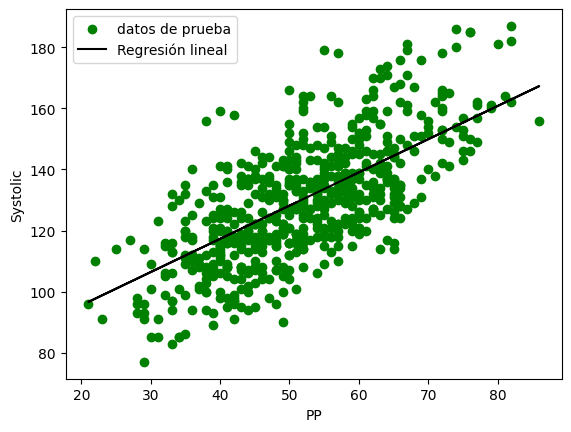

Intersección (b) 73.80690534104187
Pendiente (m) [1.08720614]


In [ ]:


# Visualizar los resultados
plt.scatter(X_test, y_test, color='green', label= 'datos de prueba')
plt.plot(X_test, y_pred, color='black', label='Regresión lineal')
plt.xlabel('PP')
plt.ylabel('Systolic')
plt.legend()
plt.show()


print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)


## Conclusión  
La pendiente positiva de 0.4076 indica que a medida que aumenta presión del pulso en una unidad, la presión sistólica tiende a aumentar en aproximadamente 0.4076 unidades. Esto sugiere una relación positiva entre ambas variables.

**R² ( coeficiente de determinación)  = 0.4977: Indica que aproximadamente el 50% de la variabilidad en la presión sistólica puede ser explicada por la presión del pulso. Es decir, la presión del pulso es un buen predictor, pero no explica toda la variabilidad.**

- Un ECM de 8.2764 indica que, en promedio, nuestras predicciones de la presión sistólica están desviadas en aproximadamente 8.28 unidades de los valores reales.
- Un MAE de 6.6569 indica que, en promedio, nuestras predicciones de la presión sistólica están desviadas en aproximadamente 6.66 unidades de los valores reales.
- Un R² de 0.4977 significa que el 49.77% de la variabilidad en la presión sistólica puede ser explicada por la presión del pulso.




# 🫀Regresion Lineal Múltiple (Predictor de exámenes médicos)




In [ ]:
df_limpio.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3082 entries, 63 to 4839
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   TestId                     3082 non-null   object 
 1   RawDataId                  3082 non-null   object 
 2   Date                       3082 non-null   object 
 3   Time                       3082 non-null   object 
 4   Systolic                   3082 non-null   float64
 5   Diastolic                  3082 non-null   float64
 6   MAP                        3082 non-null   float64
 7   HR                         3082 non-null   float64
 8   PP                         3082 non-null   float64
 9   PatientId                  3082 non-null   object 
 10  Interpretation             3082 non-null   object 
 11  HookupStartTime            3082 non-null   object 
 12  HookupEndTime              3082 non-null   object 
 13  Duration                   3082 non-null   object 
 

In [ ]:
# Convertir las colunas a datatime.
df_limpio.loc['HookupStartTime'] = pd.to_datetime(df_limpio['HookupStartTime'])
df_limpio.loc['HookupEndTime'] = pd.to_datetime(df_limpio['HookupEndTime'])
# Convert 'Systolic' and 'Diastolic' to numeric using .loc
df_limpio.loc[:, 'Systolic'] = pd.to_numeric(df_limpio['Systolic'], errors='coerce')
df_limpio.loc[:, 'Diastolic'] = pd.to_numeric(df_limpio['Diastolic'], errors='coerce')

df_limpio = df_limpio.dropna()

# calcular diferencia de time
time_diff = df_limpio['HookupEndTime'] - df_limpio['HookupStartTime']

# Calculate the midpoint using .loc
df_limpio.loc[:, 'Hour'] = df_limpio['HookupStartTime'] + time_diff / 2

# Group and calculate averages
grouped_data = df_limpio.groupby(['Age', 'GenderId', 'Hour']).agg({
    'Diastolic': 'mean',
    'Systolic': 'mean'
}).reset_index()

# Verify the result
print(grouped_data.head())


    Age GenderId                Hour  Diastolic    Systolic
0  15.0   Female 2024-04-17 22:16:30   78.69697  123.651515
1  30.0     Male 2024-04-24 22:07:00  83.883333  136.483333
2  32.0   Female 2024-05-14 22:24:30  68.508475  118.728814
3  33.0     Male 2024-04-25 22:16:00  87.163934  131.672131
4  34.0     Male 2024-08-29 22:23:00  77.407407  126.388889


### Crear variables Independientes(x) y Dependientes(y)

In [ ]:

# Crear las variables independientes (X) y dependientes (y) para la regresión
X = grouped_data[['Age', 'GenderId', 'Hour']]  # Variables predictoras
y_systolic = grouped_data['Systolic']  # Variable dependiente para la presión sistólica
y_diastolic = grouped_data['Diastolic']  # Variable dependiente para la presión diastólica

# Convertir la columna 'gender' en variable numérica (si no lo está)
X['GenderId'] = X['GenderId'].apply(lambda x: 1 if x == 'male' else 0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_systolic, y_test_systolic = train_test_split(X, y_systolic, test_size=0.2, random_state=42)
X_train, X_test, y_train_diastolic, y_test_diastolic = train_test_split(X, y_diastolic, test_size=0.2, random_state=42)


<ipython-input-84-f7911cc6981d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['GenderId'] = X['GenderId'].apply(lambda x: 1 if x == 'male' else 0)


### Crear y entrenar el modelo

In [ ]:
model_systolic = LinearRegression()
model_diastolic = LinearRegression()

X_train['Hour'] = X_train['Hour'].dt.hour
X_test['Hour'] = X_test['Hour'].dt.hour

# Entrenar el modelo con los datos de presión sistólica y diastólica
model_systolic.fit(X_train, y_train_systolic)
model_diastolic.fit(X_train, y_train_diastolic)

# Coeficientes del modelo
print(f'Coeficiente: {model.coef_}')
print(f'Intercepción: {model.intercept_}')

Coeficiente: [9.78222553]
Intercepción: 125.43375924680564


### Crear predicciones

In [ ]:

# Hacer predicciones sobre el conjunto de prueba para la presión sistólica
y_pred_systolic = model_systolic.predict(X_test)

# Hacer predicciones sobre el conjunto de prueba para la presión diastólica
y_pred_diastolic = model_diastolic.predict(X_test)

# Mostrar las primeras predicciones
print(y_pred[:5])



[125.43375925 135.21598478 125.43375925 135.21598478 125.43375925]


### Evaluar el Modelo

In [ ]:

# Evaluar el modelo de presión sistólica
rmse_systolic = np.sqrt(mean_squared_error(y_test_systolic, y_pred_systolic))
r2_systolic = r2_score(y_test_systolic, y_pred_systolic)
mae = mean_absolute_error(y_test, y_pred)

print("Resultados para la presión sistólica:")
print(f"RMSE: {rmse_systolic}")
print(f"R²: {r2_systolic}")
print(f"mae: {mae}")

Resultados para la presión sistólica:
RMSE: 10.823578246893465
R²: 0.07343193872497733
mae: 14.435920068103975


### Proporcionar un diagnostico Basado en resultados obtenidos

In [ ]:
def diagnostico(presion_sistolica, presion_diastolica):
    if presion_sistolica > 140 or presion_diastolica > 90:
        return "Hipertensión"
    elif presion_sistolica < 90 or presion_diastolica < 60:
        return "Hipotensión"
    else:
        return "Presión Normal"

# Aplicar el diagnóstico sobre las predicciones
for i in range(len(y_pred_systolic)):
    print(f"Paciente {i + 10}: {diagnostico(y_pred_systolic[i], y_pred_diastolic[i])}")

Paciente 10: Presión Normal
Paciente 11: Presión Normal
Paciente 12: Presión Normal
Paciente 13: Presión Normal
Paciente 14: Presión Normal
Paciente 15: Presión Normal
Paciente 16: Presión Normal
Paciente 17: Presión Normal
Paciente 18: Presión Normal
Paciente 19: Presión Normal
Paciente 20: Presión Normal


# 🫀Regresión lineal multiple (HR, PP, )

Si HR (frecuencia cardiaca), PP (presion del pulso) aumenta, tambien la presion systolica lo hace?

- Podremos: predecir la presion arterial de nuevos pacientes con valores conocidos de hr, edad, presion del pulso, etc.
- Identificar que variables independientes tienen un impacto significativo en la presion arterial sistolica,
- Analizar la relacion entre las variables independientes y la oresion arterual sistolica.

In [ ]:
#Seleccionar variables
x1 = "HR"
x2 = "PP"
#x3 = "Age"
y = "Systolic" #var dependiente

#Crear resultados
variables_x = [x1, x2]
variable_y = y
modelo = LinearRegression()# generamos la regresión lineal

df_limpio = df_limpio.dropna(subset=variables_x)


modelo.fit(df_limpio[variables_x], df_limpio[variable_y])# entrenamos el modelo
print ('Coeficientes: ', modelo.coef_) #obtenemos los coeficientes de las variables independientes
print ('Intercepción: ', modelo.intercept_) #obtenemos la intercepción{}

model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
print(y_pred[:5])

Coeficientes:  [0.34830645 1.11414456]
Intercepción:  47.17814653861663
[129.2544185  123.8183878  129.2544185  109.68470797 132.51603692]


La ecuación de regresión es: Systolic = 73.80690534104187 + 1.0872061403240707 * HR
Esto significa que por cada unidad que aumenta HR, la presión sistólica aumenta en promedio 1.0872061403240707 unidades


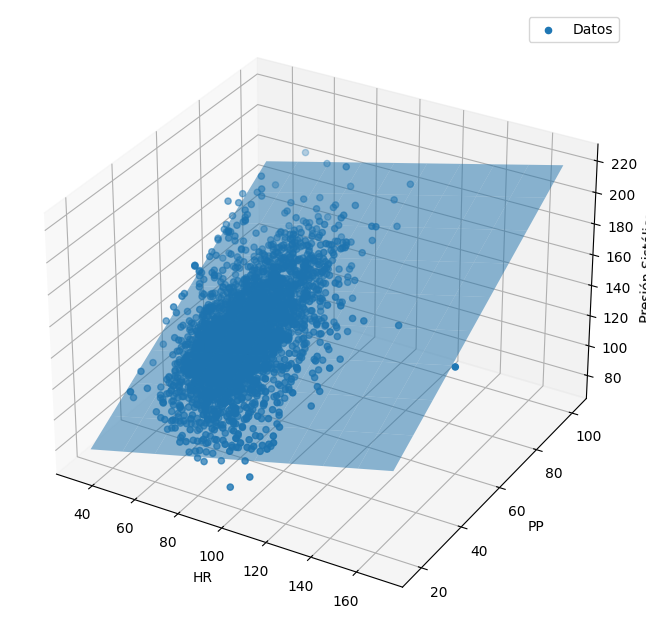

Intersección (b) 73.80690534104187
Pendiente (m) [1.08720614]
Error cuadrático medio: 14.120101567899729
Error absoluto medio: 11.285871803409913
R² Coeficiente de determinación: 0.49431532710502857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Obtener la pendiente
pendiente = model.coef_[0]
print("La ecuación de regresión es: Systolic =", model.intercept_, "+", model.coef_[0], "* HR")
print("Esto significa que por cada unidad que aumenta HR, la presión sistólica aumenta en promedio", model.coef_[0], "unidades")
from mpl_toolkits.mplot3d import Axes3D
# Gráfica en 3D


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_limpio[x1], df_limpio[x2], df_limpio[y], label='Datos')
# Crear un meshgrid para el plano
x = np.linspace(df_limpio[x1].min(), df_limpio[x1].max(), num=10)
y = np.linspace(df_limpio[x2].min(), df_limpio[x2].max(), num=10)
x, y = np.meshgrid(x, y)
# Calcular los valores z (Autos Producidos) del plano
z = modelo.intercept_ + modelo.coef_[0] * x + modelo.coef_[1] * y
# Graficar el plano
ax.plot_surface(x, y, z, alpha=0.5)
ax.set_xlabel(x1)
ax.set_ylabel(x2)
ax.set_zlabel("Presión Sistólica")
ax.legend()
plt.show()

print("Intersección (b)", model.intercept_)
print("Pendiente (m)", model.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio: {rmse}')
print(f'Error absoluto medio: {mae}')
print(f'R² Coeficiente de determinación: {r2}')


Conclusion:

- Pendiente:Son el cambio en la variable dependiente por cada cambio en la independiente.
- Error cuadrático medio: mide la diferencia entre los valores observados y los predichos. un valor mas bajo indica un mejor ajuste del modelo a los datos.
- Error absoluto medio; mide el promedio de los errores absolutos de los valores observados y predichos, mientras mas bajo mejor es el ajuste,
- R2 Este valor indica la proporción de la variabilidad en la variable dependiente que puede ser explicada por las variables independientes. Un valor de 0.588 sugiere que aproximadamente el 58.8% de la variabilidad en la presión sistólica puede ser explicada por la frecuencia cardíaca y la presión del pulso. Un valor más cercano a 1 indica un mejor ajuste del modelo

EL modelo de regresión lineal múltiple parece tener un ajuste razonable, explicando alrededor del 58.8% de la variabilidad en la presión sistólica. Los errores (MSE y MAE) también son relativamente bajos, lo que sugiere que las predicciones del modelo son bastante precisas.

## **Conclusión** (actualizar)
- Pendiente positiva en hr (m):
 (0.284): Por cada aumento de una unidad en la frecuencia cardíaca, la presión sistólica aumenta en promedio 0.284 unidades, si las otras variables se mantienen constantes. Esto sugiere una relación positiva entre la frecuencia cardíaca y - - Pendiente positiva en edad (1.148): Por cada aumento de un año en la edad, la presión sistólica aumenta en promedio 1.148 unidades.
- Pendiente negativa Presión del pulso (-0.165): Por cada aumento de una unidad en la presión del pulso, la presión sistólica disminuye en promedio 0.165 unidades, Este resultado es un poco contraintuitivo y podría deberse a otros factores no considerados en el modelo o a la complejidad de la relación entre estas variables.


-Calidad del Modelo:
- R² (0.49): El modelo explica aproximadamente el 49% de la variabilidad en la presión sistólica. Esto indica que el modelo captura una parte importante de la relación entre las variables, pero hay otros factores que no están siendo considerados.
- Error cuadrático medio y error absoluto medio: Estos valores indican que, en promedio, las predicciones del modelo se desvían del valor real de la presión sistólica en una cantidad considerable. Esto sugiere que el modelo podría no ser perfecto para hacer predicciones individuales, pero puede ser útil para identificar tendencias generales.



# Regresión Logística (Hipertensión)

- Comprender la regresion: se busca clasificar los pacientes que padecen hipertension.
- Predicción: se establece que en base a los datos de los pacientes como Frecuencia cardíaca, Presión sistólica, Diastólica y presión por pulso si padecen hipertensión.

En estos ejemplos, primero creamos la variable hipertension a partir de los datos de presión arterial. Luego, dividimos los datos en conjuntos de entrenamiento y prueba, entrenamos el modelo y evaluamos su rendimiento.



In [ ]:
#Ejemplo de Logistic Regresionn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values


# Crear la variable objetivo 'hipertension'
df_limpio['hipertension'] = ((df_limpio['Systolic'] >= 140) | (df_limpio['Diastolic'] >= 90)).astype(int)

# Definir variables independientes y dependiente
X = df_limpio[[ 'Systolic', 'HR', 'PP', 'Diastolic']]
y = df_limpio['hipertension']

# Imputar valores faltantes usando SimpleImputer
# strategy='mean' rellena los valores NaN con la media de la columna
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X) # Ajustar y transformar X

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Regresión Logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

#Gráfico de curva de precision y recall.

from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Obtener las probabilidades predichas para la clase positiva (hipertensión)
y_prob = model.predict_proba(X_test)[:, 1]  # Usar predict_proba y seleccionar la columna 1

# Calcular la curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)




Accuracy: 0.9562398703403565
Confusion Matrix:
[[403  16]
 [ 11 187]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       419
           1       0.92      0.94      0.93       198

    accuracy                           0.96       617
   macro avg       0.95      0.95      0.95       617
weighted avg       0.96      0.96      0.96       617



####Curva Sigmoide: Muestra la probabilidad predicha en función de la variable independiente.
 Esta curva muestra cómo la probabilidad de tener hipertensión cambia a medida que varía la variable independiente.

Muestra la relación entre una variable independiente (por ejemplo, Systolic) y la probabilidad de que ocurra un evento binario (en este caso, hipertension).
Eje x (Horizontal) representa los valores de la variable independiente (valores de presion Systolica)

Eje Y (vertical) representa la probabilidad predicha de hipertensión[texto del vínculo

---



In [ ]:
import statsmodels.api as sm #para ajustar el modelo y graficar con varias variables.
import numpy as np


# Agregar una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión logística
model = sm.Logit(y, X)
result = model.fit()

# Mostrar el resumen del modelo
print(result.summary())


         Current function value: 0.115258
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           hipertension   No. Observations:                 3082
Model:                          Logit   Df Residuals:                     3077
Method:                           MLE   Df Model:                            4
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:                  0.8197
Time:                        05:22:14   Log-Likelihood:                -355.23
converged:                      False   LL-Null:                       -1969.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -72.5717      4.051    -17.915      0.000     -80.511     -64.632
x1             0.3223        nan        nan        nan         na

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


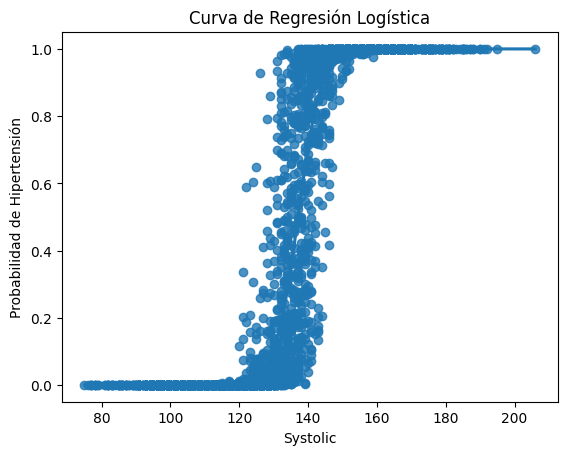

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Predecir probabilidades usando el modelo ajustado
df_limpio['predicted_prob'] = result.predict(X)

# Graficar la curva de regresión logística para una variable independiente (por ejemplo, 'Systolic')
sns.regplot(x='Systolic', y='predicted_prob', data=df_limpio, logistic=True, ci=None)
plt.xlabel('Systolic')
plt.ylabel('Probabilidad de Hipertensión')
plt.title('Curva de Regresión Logística')
plt.show()


#####Curva ROC: Evalúa la capacidad del modelo para distinguir entre clases.

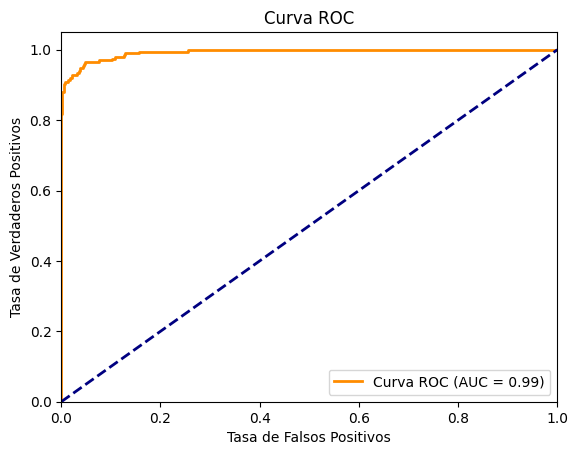

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

#Curva roc eje x = taza de falsos positivos. Y = tasa de verdaderos positivos.
#Area bajo la curva (auc) mide la capacidad del modelo para distinguir entre las classes.

####Curva de Precisión-Recall: Evalúa la precisión y el recall del modelo.


---



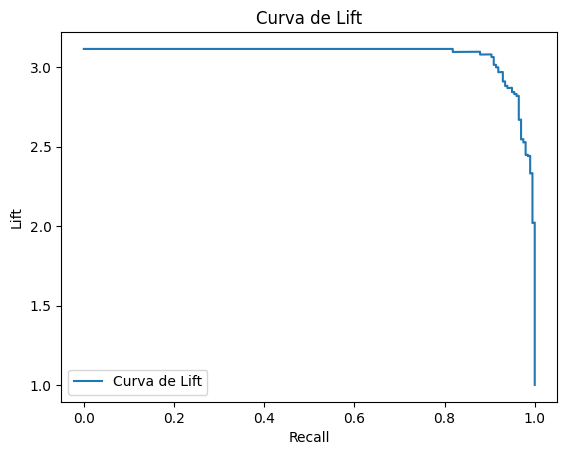

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)
lift = precision / (sum(y_test) / len(y_test))

plt.plot(recall, lift, label='Curva de Lift')
plt.xlabel('Recall')
plt.ylabel('Lift')
plt.title('Curva de Lift')
plt.legend(loc="lower left")
plt.show()

#curva de presicion-Recall, Eje x = Recall (sensibilidad)
#Eje y = precision.
#Lift = relacion entre la presicion y la tasa base de la clase positiva.

## Conclusión
- Accuary (precision) significa que el modelo predijo correctamente el 96% de los casos. Es una medida general de qué tan bien el modelo está clasificando tanto los casos positivos como los negativos.

- Confusion Matrix 750: Verdaderos negativos (TN) - Casos correctamente predichos como no hipertensos. 16: Falsos positivos (FP) - Casos incorrectamente predichos como hipertensos. 14: Falsos negativos (FN) - Casos incorrectamente predichos como no hipertensos. 189: Verdaderos positivos (TP) - Casos correctamente predichos como hipertensos.

- Clasificacion reporte:
-- clase 0 No hipertensos Precision (Precisión): 0.98: De todos los casos predichos como no hipertensos, el 98% eran correctos. -- Recall (Sensibilidad): 0.98: De todos los casos que realmente no eran hipertensos, el 98% fueron correctamente identificados.
-- F1-score: 0.98: Es la media armónica de la precisión y la sensibilidad, proporcionando un balance entre ambas.
clase 1 Hipertenso: Precision (Precisión): 0.94: De todos los casos predichos como hipertensos, el 94% eran correctos.
--  Recall (Sensibilidad): 0.93: De todos los casos que realmente eran hipertensos, el 93% fueron correctamente identificados.
--  F1-score: 0.93: Balance entre precisión y sensibilidad para la clase hipertensa.
-- Métricas generales Accuracy (Precisión): 0.97: Precisión global del modelo. Macro avg (Promedio macro): 0.96: Promedio de precisión, sensibilidad y F1-score sin considerar el desequilibrio de clases. Weighted avg (Promedio ponderado): 0.97: Promedio ponderado de precisión, sensibilidad y
-- F1-score, considerando el desequilibrio de clases.

##Interpretación de la curva

La curva de lift muestra un buen desempeño del modelo, ya que se encuentra por encima de la linea diagonal y se mantiene alta ne la parte inciial, suguiere que el modelo es capaz de identificar correctamente una proporcion significativa de los casos positivos.